In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline
# import sklearn
# from sklearn import KNeighborsClassifier
# from sklearn import preprocessing

ImportError: cannot import name KNeighborsClassifier

In [2]:
# Load in the dataset
df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.0,0.0


In [6]:
pd.crosstab(df['quality'], df['high_quality'])

high_quality,0.0,1.0
quality,,
3,30,0
4,216,0
5,2138,0
6,2836,0
7,0,1079
8,0,193
9,0,5


In [7]:
#if we randomly pick wine ~20% will be high quality
#now we make a model with baselines and see if we can get more high
#quality wines with our model. 
df['high_quality'].describe()

count    6497.000000
mean        0.196552
std         0.397421
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: high_quality, dtype: float64

In [12]:
#find some things to tell us what may link together fine wines
df.corr().loc[:, 'high_quality']

fixed_acidity          -0.049447
volatile_acidity       -0.151714
citric_acid             0.054444
residual_sugar         -0.063992
chlorides              -0.161781
free_sulfur_dioxide     0.014767
total_sulfur_dioxide   -0.051226
density                -0.275441
pH                      0.028149
sulphates               0.033971
alcohol                 0.390486
quality                 0.759360
is_red                 -0.087479
high_quality            1.000000
Name: high_quality, dtype: float64

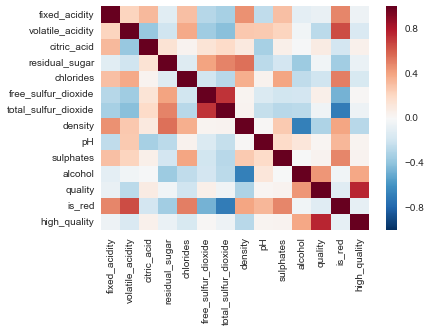

In [15]:
sns.heatmap(df.corr());

In [21]:
good_features = ['volatile_acidity', 'chlorides', 'density', 'alcohol']
df[good_features].head()
good_features = df[good_features]

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [23]:
SS = StandardScaler()
SS.fit_transform(good_features)

array([[ 2.18883292,  0.56995782,  1.03499282, -0.91546416],
       [ 3.28223494,  1.1979747 ,  0.70148631, -0.58006813],
       [ 2.55330026,  1.02669737,  0.76818761, -0.58006813],
       ..., 
       [-0.6054167 , -0.42915996, -0.71925142, -0.91546416],
       [-0.30169391, -0.97153818, -2.00325148,  1.9354021 ],
       [-0.78765037, -1.02863062, -1.7631268 ,  1.09691202]])

In [24]:
good_features.head()

,volatile_acidity,chlorides,density,alcohol
0,0.70,0.076,0.9978,9.4
1,0.88,0.098,0.9968,9.8
2,0.76,0.092,0.9970,9.8
3,0.28,0.075,0.9980,9.8
4,0.70,0.076,0.9978,9.4


In [38]:
knn = KNeighborsClassifier(n_neighbors=7)

In [39]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [46]:
y = df['high_quality']

In [47]:
x = SS.fit_transform(good_features)

In [48]:
print y,x

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       1.0
8       1.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      1.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
6467    0.0
6468    0.0
6469    1.0
6470    0.0
6471    0.0
6472    0.0
6473    0.0
6474    0.0
6475    1.0
6476    0.0
6477    0.0
6478    0.0
6479    0.0
6480    0.0
6481    0.0
6482    0.0
6483    0.0
6484    0.0
6485    1.0
6486    1.0
6487    0.0
6488    0.0
6489    0.0
6490    0.0
6491    0.0
6492    0.0
6493    0.0
6494    0.0
6495    1.0
6496    0.0
Name: high_quality, dtype: float64 [[ 2.18883292  0.56995782  1.03499282 -0.91546416]
 [ 3.28223494  1.1979747   0.70148631 -0.58006813]
 [ 2.55330026  1.02669737  0.76818761 -0.58006813]
 ..., 
 [-0.6054167  -0.42915996 -0.71925142 -0.91546416]
 [-0.30169391 -0.97153

In [49]:
y.shape

(6497,)

In [50]:
x.shape

(6497, 4)

In [51]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [52]:
knn.score(x,y)

0.85978143758657843

In [53]:
#cross validate to check accuracy
from sklearn.cross_validation import cross_val_score

In [55]:
knn = KNeighborsClassifier(n_neighbors=7)
scores = cross_val_score(knn,x, y, cv=7)
print "Cross-validated scores:", scores

Cross-validated scores: [ 0.80516685  0.7255113   0.79332616  0.7887931   0.79310345  0.73570658
  0.78856526]


In [57]:
import numpy as np
np.mean(scores)

0.77573895744134158

In [60]:
my_scores = {}

for n in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn,x, y, cv=7)
    print 'For %s neighbors, %s average accuracy across 7-fold cv!' % (n, np.mean(scores))
    my_scores[n] = np.mean(scores)

For 1 neighbors, 0.745096732421 average accuracy across 7-fold cv!
For 2 neighbors, 0.776353889598 average accuracy across 7-fold cv!
For 3 neighbors, 0.754032440648 average accuracy across 7-fold cv!
For 4 neighbors, 0.782668457956 average accuracy across 7-fold cv!
For 5 neighbors, 0.76973774559 average accuracy across 7-fold cv!
For 6 neighbors, 0.781128883383 average accuracy across 7-fold cv!
For 7 neighbors, 0.775738957441 average accuracy across 7-fold cv!
For 8 neighbors, 0.792984164793 average accuracy across 7-fold cv!
For 9 neighbors, 0.786367355101 average accuracy across 7-fold cv!
For 10 neighbors, 0.795604813264 average accuracy across 7-fold cv!
For 11 neighbors, 0.786824201933 average accuracy across 7-fold cv!
For 12 neighbors, 0.794526229961 average accuracy across 7-fold cv!
For 13 neighbors, 0.792985325808 average accuracy across 7-fold cv!
For 14 neighbors, 0.796987793867 average accuracy across 7-fold cv!
For 15 neighbors, 0.792367239517 average accuracy across 7

In [62]:
import matplotlib.pyplot as plt
plt.scatter(my_scores.key(), my_scores.values())

AttributeError: 'dict' object has no attribute 'key'